In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

path_police = '/content/drive/MyDrive/2025-2학기/text/new data/경찰청_시도청별 가정폭력검거및조치현황_20241231.csv'
path_gangwon = '/content/drive/MyDrive/2025-2학기/text/new data/경찰청 강원특별자치도경찰청_가정폭력 범죄 검거 현황_20241231.csv'
path_seoul = '/content/drive/MyDrive/2025-2학기/text/new data/가정폭력+발생현황_seoul(2023).xlsx'

df_police = pd.read_csv(path_police, encoding='cp949')
df_gangwon = pd.read_csv(path_gangwon, encoding='cp949')
df_seoul = pd.read_excel(path_seoul)

cols_df = pd.DataFrame({
    '데이터셋': ['경찰청(전국)'] * len(df_police.columns)
                + ['강원청'] * len(df_gangwon.columns)
                + ['서울시'] * len(df_seoul.columns),
    '컬럼명': list(df_police.columns)
             + list(df_gangwon.columns)
             + list(df_seoul.columns)
})

cols_df

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,데이터셋,컬럼명
0,경찰청(전국),연도
1,경찰청(전국),검거건수
2,경찰청(전국),검거총인원
3,경찰청(전국),구속인원
4,경찰청(전국),불구속인원
5,경찰청(전국),가정보호사건 송치
6,강원청,연도
7,강원청,검거건수
8,강원청,검거인원
9,서울시,구분별(1)


# 전국/강원청 데이터 통합

In [ ]:
df_police = df_police[['연도','검거건수']].assign(지역='전국')
df_gangwon = df_gangwon[['연도','검거건수']].assign(지역='강원')
df_merge = pd.concat([df_police, df_gangwon])

# 전국/강원 데이터 전처리

In [ ]:

df_police_use = df_police[['연도','검거건수']].copy()
df_police_use['지역'] = '전국'
df_police_use.rename(columns={'검거건수':'건수'}, inplace=True)

df_gangwon_use = df_gangwon[['연도','검거건수']].copy()
df_gangwon_use['지역'] = '강원'
df_gangwon_use.rename(columns={'검거건수':'건수'}, inplace=True)

df_merge = pd.concat([df_police_use, df_gangwon_use], ignore_index=True)

# 전국·강원 데이터 전처리 (월 추가)

In [ ]:
import pandas as pd

df_year = df_merge[df_merge['지역'].isin(['전국','강원'])].copy()
df_year = df_year.loc[df_year.index.repeat(12)].reset_index(drop=True)

df_year['월'] = list(range(1,13)) * (len(df_year)//12)

# 서울시 따로 처리

In [ ]:
df_seoul_long = df_seoul.melt(id_vars=['구분별(1)', '구분별(2)'],
                              var_name='월',
                              value_name='발생건수')
df_seoul_long['연도'] = 2023

# 서울시 데이터 전처리

# 서울 데이터 전처리 (월 숫자형 변환)



In [ ]:
df_seoul = df_seoul_long[df_seoul_long['구분별(1)']=='신고건수'].copy()
df_seoul['월'] = df_seoul['월'].str.extract('(\d+)$')[0].astype(int)
df_seoul['지역'] = '서울'
df_seoul.rename(columns={'발생건수':'건수'}, inplace=True)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3588982503.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_seoul['월'] = df_seoul['월'].str.extract('(\d+)$')[0].astype(int)


# 데이터 통합

In [ ]:
df_clean = pd.concat([df_year, df_seoul], ignore_index=True)

df_clean.sort_values(by=['지역','연도','월'], inplace=True)
df_clean.reset_index(drop=True, inplace=True)

df_clean.head(15)

,연도,건수,지역,월,구분별(1),구분별(2)
0,2016,1352,강원,1,NaN,NaN
1,2016,1352,강원,2,NaN,NaN
2,2016,1352,강원,3,NaN,NaN
3,2016,1352,강원,4,NaN,NaN
4,2016,1352,강원,5,NaN,NaN
5,2016,1352,강원,6,NaN,NaN
6,2016,1352,강원,7,NaN,NaN
7,2016,1352,강원,8,NaN,NaN
8,2016,1352,강원,9,NaN,NaN
9,2016,1352,강원,10,NaN,NaN


In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 91.6 MB/s eta 0:00:00


# 시각화 - 연도별 검거건수 (전국/강원)

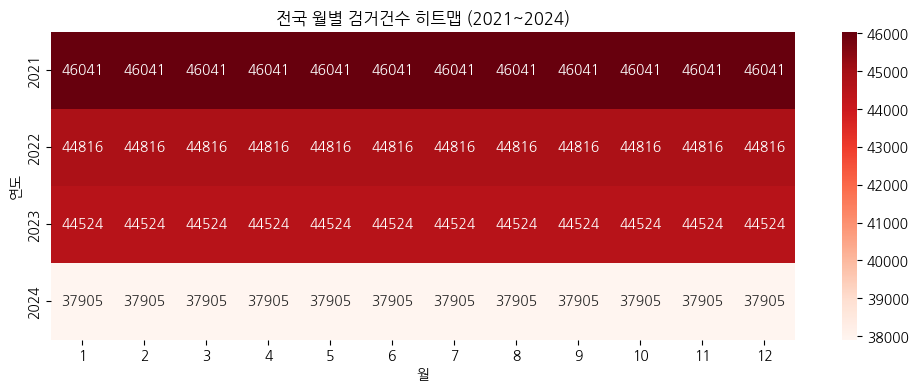

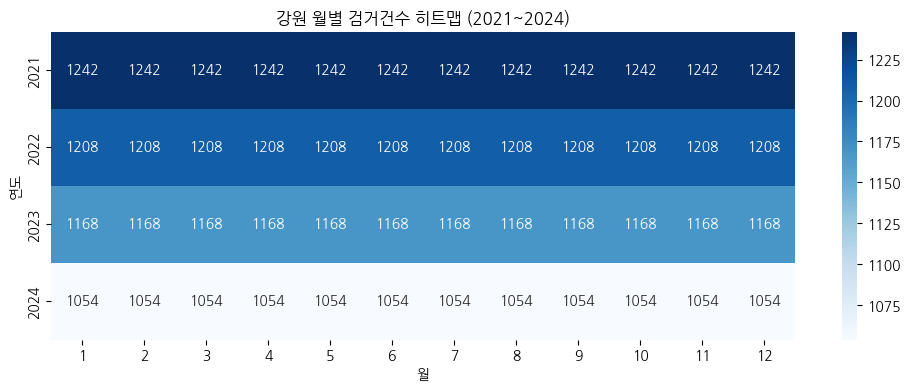

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot_ng = df_clean[
    (df_clean['지역'].isin(['전국','강원'])) &
    (df_clean['연도'] >= 2021) & (df_clean['연도'] <= 2024)
].copy()

df_plot_ng['연도'] = df_plot_ng['연도'].astype(int)

for region in ['전국','강원']:
    pivot = df_plot_ng[df_plot_ng['지역']==region].pivot(index='연도', columns='월', values='건수')

    plt.figure(figsize=(12,4))
    sns.heatmap(pivot, annot=True, fmt='g', cmap='Reds' if region=='전국' else 'Blues')
    plt.title(f'{region} 월별 검거건수 히트맵 (2021~2024)')
    plt.xlabel('월')
    plt.ylabel('연도')
    plt.show()

# 시각화 - 서울 2023 월별 가정폭력 발생건수

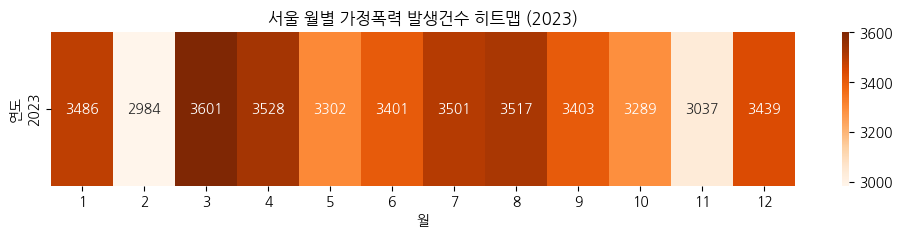

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot_seoul = df_clean[(df_clean['지역']=='서울') & (df_clean['연도']==2023)].copy()

df_plot_seoul_agg = df_plot_seoul.groupby(['연도', '월'])['건수'].sum().reset_index()

pivot_seoul = df_plot_seoul_agg.pivot(index='연도', columns='월', values='건수')

plt.figure(figsize=(12,2))
sns.heatmap(pivot_seoul, annot=True, fmt='g', cmap='Oranges')
plt.title('서울 월별 가정폭력 발생건수 히트맵 (2023)')
plt.xlabel('월')
plt.ylabel('연도')
plt.show()

# 전국·강원·서울 히트맵 비교

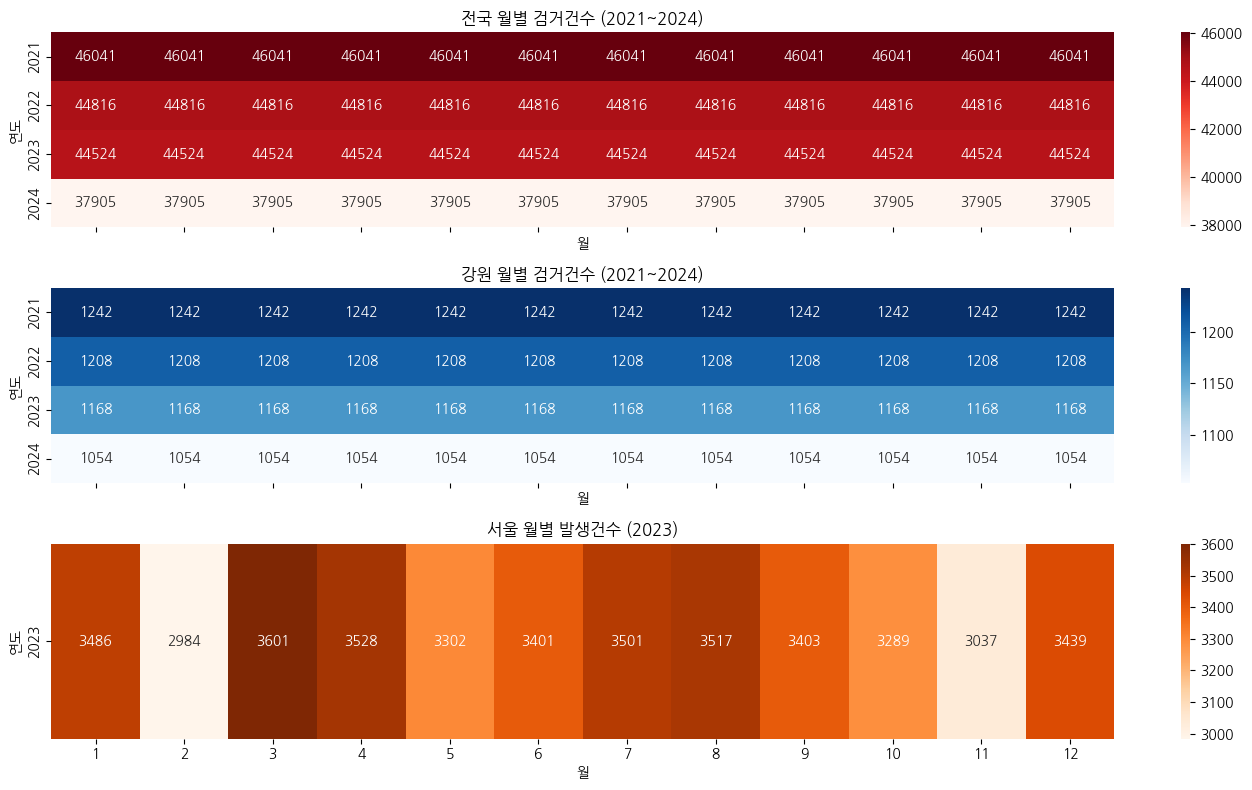

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot_ng = df_clean[
    (df_clean['지역'].isin(['전국','강원'])) &
    (df_clean['연도'] >= 2021) & (df_clean['연도'] <= 2024)
].copy()
df_plot_ng['연도'] = df_plot_ng['연도'].astype(int)

df_plot_seoul = df_clean[(df_clean['지역']=='서울') & (df_clean['연도']==2023)].copy()

df_plot_seoul_agg = df_plot_seoul.groupby(['연도', '월'])['건수'].sum().reset_index()

pivot_전국 = df_plot_ng[df_plot_ng['지역']=='전국'].pivot(index='연도', columns='월', values='건수')
pivot_강원 = df_plot_ng[df_plot_ng['지역']=='강원'].pivot(index='연도', columns='월', values='건수')
pivot_서울 = df_plot_seoul_agg.pivot(index='연도', columns='월', values='건수')

fig, axes = plt.subplots(3, 1, figsize=(14,8), sharex=True)

sns.heatmap(pivot_전국, annot=True, fmt='g', cmap='Reds', ax=axes[0])
axes[0].set_title('전국 월별 검거건수 (2021~2024)')

sns.heatmap(pivot_강원, annot=True, fmt='g', cmap='Blues', ax=axes[1])
axes[1].set_title('강원 월별 검거건수 (2021~2024)')

sns.heatmap(pivot_서울, annot=True, fmt='g', cmap='Oranges', ax=axes[2])
axes[2].set_title('서울 월별 발생건수 (2023)')

for ax in axes:
    ax.set_ylabel('연도')
axes[2].set_xlabel('월')

plt.tight_layout()
plt.show()

In [ ]:
# 전국·강원·서울 데이터를 모두 합치기
df_ng = df_plot_ng.copy()  # 전국·강원
df_seoul = df_plot_seoul.copy()  # 서울

df_model = pd.concat([df_ng, df_seoul], ignore_index=True)

df_model = df_model.sort_values(['연도','월','지역']).reset_index(drop=True)

print(df_model.head())

     연도     건수  지역  월 구분별(1) 구분별(2)
0  2021   1242  강원  1    NaN    NaN
1  2021  46041  전국  1    NaN    NaN
2  2021   1242  강원  2    NaN    NaN
3  2021  46041  전국  2    NaN    NaN
4  2021   1242  강원  3    NaN    NaN


# 모델 피처 확장 - 월별 증가율

In [ ]:
df_model['건수_전월비'] = df_model.groupby('지역')['건수'].pct_change()

# 모델 피처 확장 - 분기별 총 건수

In [ ]:
df_model['분기'] = ((df_model['월']-1)//3)+1
df_quarter = df_model.groupby(['연도','분기','지역'])['건수'].sum().reset_index()

# 피처 확인

In [ ]:
df_model['건수_전월비'] = df_model['건수_전월비'].fillna(0)